In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns

sns.set_theme("notebook", "whitegrid")

In [2]:
df_proj = pl.read_csv(
    r"/Users/malleshamyamulla/Desktop/SSBBA/MBB_PROJECT/data/DBAS_Projects_22_23.csv",
    ignore_errors=True,
)

In [3]:
df_proj.columns = [
    "project_name",
    "total_files",
    "no_of_analysts",
    "no_of_days",
    "no_of_hours",
]

In [4]:
df_proj.head()

project_name,total_files,no_of_analysts,no_of_days,no_of_hours
str,i64,i64,i64,i64
"""PROJECT_1""",2437,7,4,32
"""PROJECT_2""",282,11,12,96
"""PROJECT_3""",202,6,5,40
"""PROJECT_4""",294,11,6,48
"""PROJECT_5""",62090,7,22,176


In [61]:
def generate_no_of_files_piiphi(_fc):
    _perc = random.randrange(80, 100)
    return (_fc * _perc) // 100


# 0.30-0.01
def generate_fps(_fc):
    _perc = random.randrange(1,30)
    return (_fc * _perc) // 100


# 0.30-0.01
def generate_fns(_fc):
    _perc = random.randrange(1, 40)
    return (_fc * _perc) // 100

In [6]:
df_proj.describe()

statistic,project_name,total_files,no_of_analysts,no_of_days,no_of_hours
str,str,f64,f64,f64,f64
"""count""","""5221""",5219.0,150.0,128.0,128.0
"""null_count""","""0""",2.0,5071.0,5093.0,5093.0
"""mean""",null,14740.265951,7.38,20.390625,163.125
"""std""",null,39572.2687,3.235022,25.352393,202.819147
"""min""","""PROJECT_1""",28.0,1.0,1.0,8.0
"""25%""",null,285.0,6.0,5.0,40.0
"""50%""",null,1218.0,7.0,11.0,88.0
"""75%""",null,8693.0,9.0,24.0,192.0
"""max""","""PROJECT_999""",468649.0,17.0,162.0,1296.0


In [7]:
def generate_days_count(_files):
    if _files >= 100 and _files < 300:
        _perc = random.randrange(1, 5)
        return _perc
    elif _files >= 300 and _files < 2000:
        _perc = random.randrange(5, 11)
        return _perc
    elif _files >= 2000 and _files < 10000:
        _perc = random.randrange(11, 24)
        return _perc
    elif _files >= 10000:
        _perc = random.randrange(24, 165)
        return _perc
    else:
        return 1

In [8]:
def generate_analyst_count(_files):
    if _files >= 100 and _files < 300:
        _perc = random.randrange(1, 5)
        return _perc
    elif _files >= 300 and _files < 2000:
        _perc = random.randrange(5, 8)
        return _perc
    elif _files >= 2000 and _files < 10000:
        _perc = random.randrange(8, 12)
        return _perc
    elif _files >= 10000:
        _perc = random.randrange(12, 18)
        return _perc
    else:
        return 1

In [9]:
df_proj_v1 = (
    df_proj.with_columns(
        [
            pl.col("total_files")
            .map_elements(lambda x: generate_analyst_count(x))
            .alias("no_of_analysts"),
            pl.col("total_files")
            .map_elements(lambda x: generate_days_count(x))
            .alias("no_of_days"),
        ]
    )
    .with_columns((pl.col("no_of_days") * 8).alias("no_of_hours"))
    .with_columns(
        pl.col("total_files")
        .map_elements(lambda x: generate_no_of_files_piiphi(x))
        .alias("no_of_pii_phi_tag_files")
    )
    .with_columns(
        pl.col("no_of_pii_phi_tag_files")
        .map_elements(lambda x: generate_fps(x))
        .alias("no_of_FPS")
    )
    .with_columns(
        pl.col("no_of_pii_phi_tag_files")
        .map_elements(lambda x: generate_fns(x))
        .alias("no_of_FNS")
    )
    .with_columns((pl.col("no_of_FPS") + pl.col("no_of_FNS")).alias("total_FPS_FNS"))
    .with_columns(
        (pl.col("no_of_pii_phi_tag_files") - pl.col("total_FPS_FNS")).alias(
            "total_TPS_TNS"
        )
    )
    .with_columns(
        (
            (pl.col("total_TPS_TNS"))
            / (pl.col("total_TPS_TNS") + pl.col("total_FPS_FNS"))
        ).alias("accuracy_")
    )
)

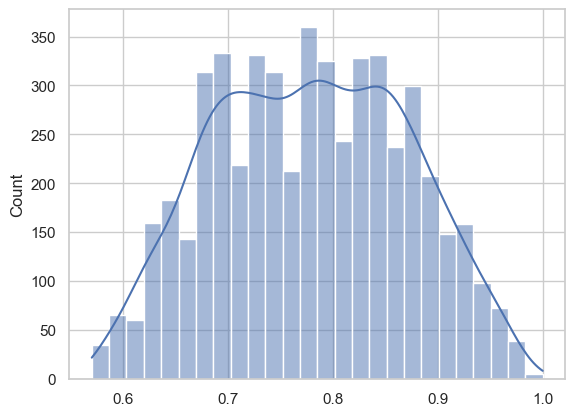

In [10]:
sns.histplot(df_proj_v1["accuracy_"], kde=True)
plt.show()

In [13]:
df_proj_v1.write_csv(
    r"/Users/malleshamyamulla/Desktop/SSBBA/MBB_PROJECT/data/DBAS_Projects_Data_Tidy_V2.csv"
)

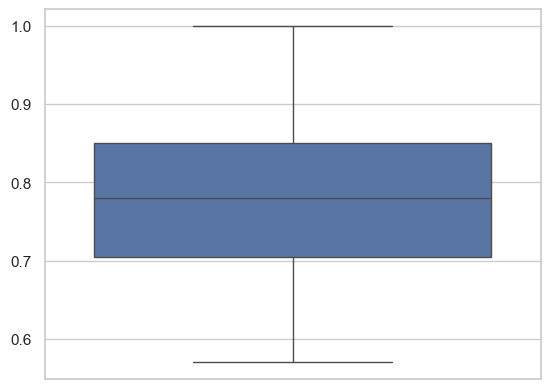

In [11]:
sns.boxplot(df_proj_v1["accuracy_"])
plt.show()

In [12]:
df_proj_v1["accuracy_"].describe()

statistic,value
str,f64
"""count""",5219.0
"""null_count""",2.0
"""mean""",0.778561
"""std""",0.092345
"""min""",0.570006
"""25%""",0.70412
"""50%""",0.780068
"""75%""",0.850254
"""max""",1.0


### NEW

In [14]:
df_new = pl.read_excel(
    r"/Users/malleshamyamulla/Desktop/SSBBA/MBB_PROJECT/data/DBAS_SDS_Projects_2023_V2.xlsx"
).filter(pl.col("Total Files").is_not_null())

In [37]:
def _custom_count(x):
    return len(x)


df_new_2 = df_new.with_columns(pl.col("Team Member Name").str.split(",")).with_columns(
    pl.col("Team Member Name")
    .map_elements(lambda x: _custom_count(x))
    .alias("no_of_analyst")
)

In [62]:
DF_T = df_new_2.with_columns(
        pl.col("Total Files")
        .map_elements(lambda x: generate_no_of_files_piiphi(x))
        .alias("no_of_pii_phi_tag_files")
    ).with_columns(
        pl.col("no_of_pii_phi_tag_files")
        .map_elements(lambda x: generate_fps(x))
        .alias("no_of_FPS")
    ).with_columns(
        pl.col("no_of_pii_phi_tag_files")
        .map_elements(lambda x: generate_fns(x))
        .alias("no_of_FNS")
    ).with_columns((pl.col("no_of_FPS") + pl.col("no_of_FNS")).alias("total_FPS_FNS")).with_columns(
        (pl.col("no_of_pii_phi_tag_files") - pl.col("total_FPS_FNS")).alias(
            "total_TPS_TNS"
        )
    ).with_columns(
        (
            (pl.col("total_TPS_TNS"))
            / (pl.col("total_TPS_TNS") + pl.col("total_FPS_FNS"))
        ).alias("accuracy_")
    )

In [68]:
DF_T.drop('Team Member Name').write_csv(r'/Users/malleshamyamulla/Desktop/SSBBA/MBB_PROJECT/data/DBAS_Projects_Data_Tidy_V3.csv')

In [67]:
DF_T

Project Name,Total Files,Started Date,Complete Date,Team Member Name,NO_OF_DAYS,NO_OF_DAYS_NORM,NO_OF_SERVICE_WORKING_HRS,no_of_analyst,no_of_pii_phi_tag_files,no_of_FPS,no_of_FNS,total_FPS_FNS,total_TPS_TNS,accuracy_
str,i64,str,str,list[str],i64,i64,i64,i64,i64,i64,i64,i64,i64,f64
"""PROJECT_1""",15,"""01-03-23""","""01-04-23""","[""Karthik""]",1,2,16,1,12,0,4,4,8,0.666667
"""PROJECT_2""",2437,"""01-09-23""","""01-12-23""","[""Anitha"", ""Saikrishna"", … ""Anusha""]",3,4,32,11,2339,374,701,1075,1264,0.540402
"""PROJECT_3""",24,"""12-30-23""","""12-30-23""","[""Anusha"", ""Praveen"", ""Mahesh""]",0,1,8,3,21,2,5,7,14,0.666667
"""PROJECT_4""",9,"""01-09-23""","""01-09-23""","[""Naresh K"", ""Sneh"", … ""Mahesh""]",0,1,8,4,7,0,0,0,7,1.0
"""PROJECT_5""",14,"""01-10-23""","""01-10-23""","[""Anitha""]",0,1,8,1,13,2,4,6,7,0.538462
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""PROJECT_256""",27,"""12-26-23""","""12-27-23""","[""Aravind""]",1,2,16,1,22,0,7,7,15,0.681818
"""PROJECT_257""",1713,"""12-27-23""","""01-10-24""","[""Akil Sai"", "" Karthik A"", … "" Anitha""]",14,15,120,5,1507,256,376,632,875,0.580624
"""PROJECT_258""",102,"""12-26-23""","""01-08-24""","[""Naresh K"", "" Sahith"", "" Sneha""]",13,14,112,3,91,7,31,38,53,0.582418


| Sl. No | CTQ | Type | Spec | Target | LSL | USL |
|---|---|---|---|---|---|---|
| 1 | Accuracy | Measurable | >= 90% | 90% | - | 98% |  
| 2 | Notification Delay Time | Measurable | Minimized | < 2 Weeks | - | 2 Weeks | 

| Sl. No | CTQ | Type |Target | LSL | USL |
|---|---|---|---|---|---|
| 1 | Accuracy | Measurable | 90% | 90% | 95% | 
| 2 | Notification Delay Time | Measurable |< 2 Weeks | 1Week | 2 Weeks |